In [8]:
import time
from logging import config

import pandas as pd
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By

URL = "https://app.adcio.ai/en/"

options = webdriver.ChromeOptions()
options.add_experimental_option('prefs', {'intl.accept_languages': 'en-GB'})
driver = webdriver.Chrome(executable_path="chromedriver", options=options)

driver.get(url=URL)

In [9]:
x, y, height, width = map(int, driver.execute_script("return window.scrollX + ',' + window.scrollY + ',' + window.innerHeight + ',' + window.innerWidth").split(","))
total_height, total_width = map(int, driver.execute_script("return document.body.clientHeight + ',' + document.body.clientWidth").split(","))                                                 

In [38]:
elements = driver.find_elements("xpath", "//*[not(self::script) and not(self::style)]")

In [39]:
writable_tag = {"textarea": "placeholder", "input": "type"}

In [40]:
start = time.time()

new_elements = []
for element in elements:
    is_included = (
        element.location["x"] > x 
        and element.location["y"] > y 
        and element.location["x"] + element.size["width"] < x + width 
        and element.location["y"] + element.size["height"] < y + height
        and element.location["x"] > 0
        and element.location["y"] > 0
        and element.size["height"] > 0
        and element.size["width"] > 0
    )
    if not is_included:
        continue
    if element.tag_name in writable_tag.keys():
        new_elements.append((element, element.get_attribute(writable_tag[element.tag_name])))
    elif element.text != "":
        if len(element.find_elements("xpath", "./child::*")) == 0:
            new_elements.append((element, element.text))
            
print(time.time() - start)

StaleElementReferenceException: Message: stale element reference: stale element not found
  (Session info: chrome=113.0.5672.63)
Stacktrace:
0   chromedriver                        0x000000010055f8ac chromedriver + 4257964
1   chromedriver                        0x0000000100557f40 chromedriver + 4226880
2   chromedriver                        0x00000001001949d4 chromedriver + 281044
3   chromedriver                        0x0000000100199200 chromedriver + 299520
4   chromedriver                        0x000000010019ab34 chromedriver + 305972
5   chromedriver                        0x000000010019ac24 chromedriver + 306212
6   chromedriver                        0x00000001001cb0a8 chromedriver + 503976
7   chromedriver                        0x00000001001c51cc chromedriver + 479692
8   chromedriver                        0x00000001002067e4 chromedriver + 747492
9   chromedriver                        0x00000001001c398c chromedriver + 473484
10  chromedriver                        0x00000001001c498c chromedriver + 477580
11  chromedriver                        0x000000010051e900 chromedriver + 3991808
12  chromedriver                        0x0000000100522354 chromedriver + 4006740
13  chromedriver                        0x0000000100522940 chromedriver + 4008256
14  chromedriver                        0x000000010052833c chromedriver + 4031292
15  chromedriver                        0x0000000100522f34 chromedriver + 4009780
16  chromedriver                        0x00000001004fb490 chromedriver + 3847312
17  chromedriver                        0x00000001005409f4 chromedriver + 4131316
18  chromedriver                        0x0000000100540b4c chromedriver + 4131660
19  chromedriver                        0x0000000100551230 chromedriver + 4198960
20  libsystem_pthread.dylib             0x00000001904a7fa8 _pthread_start + 148
21  libsystem_pthread.dylib             0x00000001904a2da0 thread_start + 8


In [ ]:
elements

In [33]:
get_css_path = """var cssPath = function(el) {
    if (!(el instanceof Element)) 
        return;
    var path = [];
    while (el.nodeType === Node.ELEMENT_NODE) {
        var selector = el.nodeName.toLowerCase();
        if (el.id) {
            selector += '#' + el.id;
            path.unshift(selector);
            break;
        } else {
            var sib = el, nth = 1;
            var has_next = sib.nextElementSibling != null;
            while (sib = sib.previousElementSibling) {
                if (sib.nodeName.toLowerCase() == selector)
                    nth++;
            }
            if (nth != 1 || has_next)
                selector += "["+nth+"]";
        }
        path.unshift(selector);
        el = el.parentNode;
    }
    return path.join(" > ");
}"""

In [34]:
print(f"Total Height, Width: {total_height}, {total_width}\n")
print("x, y, height, width, css_selector, text")
for (element, content) in new_elements:
    print(element.id, f"{element.location['x']}, {element.location['y']}, {element.size['height']}, {element.size['width']}, {driver.execute_script(f'{get_css_path}; return cssPath(arguments[0]);', element)}, {content}")

Total Height, Width: 1447, 1200

x, y, height, width, css_selector, text
B961D202DE903DA19D3FB5B73613E53A_element_162 913, 12, 36, 97, div#__next > main > div > header[1] > div > div[2] > div > a[1], MAIN PAGE
B961D202DE903DA19D3FB5B73613E53A_element_163 1011, 12, 36, 65, div#__next > main > div > header[1] > div > div[2] > div > a[2], LOGIN
B961D202DE903DA19D3FB5B73613E53A_element_185 176, 138, 35, 928, div#__next > main > div > div > main > div[1] > div[2] > div[2] > div[1] > h2[1], AWAKE YOUR POTENTIAL BUSINESS
B961D202DE903DA19D3FB5B73613E53A_element_186 176, 178, 22, 928, div#__next > main > div > div > main > div[1] > div[2] > div[2] > div[1] > div, ADCIO is Awesome


In [35]:
for i in elements:
    if i.id == "B961D202DE903DA19D3FB5B73613E53A_element_163":
        asdf = i

In [36]:
asdf

<selenium.webdriver.remote.webelement.WebElement (session="680efb981f1fc5a4dcac683a7f3a2d8c", element="B961D202DE903DA19D3FB5B73613E53A_element_163")>

In [37]:
from selenium.webdriver.common.action_chains import ActionChains
ac = ActionChains(driver)
ac.click(asdf).perform()

# LEGACY

In [370]:
html = driver.page_source

In [371]:
from bs4 import BeautifulSoup

In [372]:
soup = BeautifulSoup(html, 'html.parser')

In [373]:
for script in soup(["script", "style"]):
    script.extract()

In [374]:
soup

<html class="a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.23.1-2023-04-28" data-platform="MacIntel" data-useragent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36" lang="en-us"><!-- sp:feature:head-start --><head><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.

In [375]:
def traverse(t, current_path=None):
    if current_path is None:
        current_path = [t.name]

    for tag in t.find_all(recursive=False):
        if not tag.find():
            if tag.find(text=True) == None or tag.find(text=True).strip() == "":
                continue
            print(
                " -> ".join(
                    current_path + [tag.name, tag.find(text=True).strip()]
                )
            )
        else:
            traverse(tag, current_path + [tag.name])

In [25]:
import pytesseract

if language == "ko":
    lang = "kor"
else:
    lang = "eng"
    
df = pytesseract.image_to_data(
    Image.open("screenshot.png"),
    output_type="data.frame",
    lang=lang,
    config=r'--tessdata-dir "./tessdata/" --oem 3',   
)
df["center_x"] = (df["left"] + df["width"]) // 2
df["center_y"] = (df["top"] + df["height"]) // 2
print(df)

     level  page_num  block_num  par_num  line_num  word_num  left   top  \
0        1         1          0        0         0         0     0     0   
1        2         1          1        0         0         0    36    35   
2        3         1          1        1         0         0    36    35   
3        4         1          1        1         1         0    36    35   
4        5         1          1        1         1         1    36    36   
..     ...       ...        ...      ...       ...       ...   ...   ...   
263      5         1         45        1         1         1  1682  1574   
264      2         1         46        0         0         0   266   222   
265      3         1         46        1         0         0   266   222   
266      4         1         46        1         1         0   266   222   
267      5         1         46        1         1         1   266   222   

     width  height       conf    text  center_x  center_y  
0     2400    1834  -1.0000

In [27]:
df[df.conf > 85].groupby(["level", "page_num", "block_num", "par_num", "line_num"])["text"].apply(lambda x: ' '.join(x)).reset_index()

,level,page_num,block_num,par_num,line_num,text
0,5,1,1,1,1,Deliver to
1,5,1,2,1,1,Republic of Korea
2,5,1,3,1,1,
3,5,1,4,1,1,"Hello, sign in Returns 0"
4,5,1,4,1,2,Search Amazon & Orders
5,5,1,5,1,1,= Deals Customer Service Cards
6,5,1,6,1,1,
7,5,1,7,1,1,
8,5,1,8,1,1,Headsets Keyboards
9,5,1,9,1,1,


In [28]:
import cv2

In [29]:
img = cv2.imread('screenshot.png')
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

In [34]:
boxes = df[df.conf > 85][["left", "top", "width", "height"]].to_numpy()

In [35]:
def check_in_box(array: np.array, point: tuple):
    for i in array:
        if point[0] >= i[0] \
        and point[1] >= i[1] \
        and point[0] + point[2] <= i[0] + i[2] \
        and point[1] + point[3] <= i[1] + i[3]:
            return True
    return False

In [38]:
df[df.conf > 85]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,center_x,center_y
6,5,1,1,1,1,3,308,35,73,17,92.310570,Deliver,190,26
7,5,1,1,1,1,4,388,35,19,17,92.310570,to,203,26
13,5,1,2,1,1,1,308,61,116,27,91.860275,Republic,212,44
14,5,1,2,1,1,2,433,61,26,21,93.196152,of,229,41
15,5,1,2,1,1,3,468,61,77,21,90.471497,Korea,272,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,5,1,44,1,1,2,2006,1702,134,31,92.032158,around,1070,866
258,5,1,44,1,2,1,1895,1750,62,31,91.663040,the,978,890
259,5,1,44,1,2,2,1969,1750,110,31,91.812866,world,1039,890
263,5,1,45,1,1,1,1682,1574,610,260,95.000000,,1146,917


hi
7
    0.6486011269153361
hi
hi
hi
12
    0.43756114998622225
hi
2
    0.0
8
    0.11243488046727461
5
hi
hi
15
    0.4749654769395287
7
    0.3114244981808224
hi
hi
hi
hi
hi
13
    0.22322077617432115
hi
9
    0.6941523294983118
hi
hi
hi
16
    0.34689997824472385
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
6
4
7
    0.16915946989531355
6
10
    0.14604499283029249
hi
hi
hi
6
12
    0.38451553047954934
14
    0.4933982794580583
hi
8
    0.0
hi
hi
12
    0.308689633170956
hi
12
    0.25061770296920954
hi
hi
hi
8
    0.054563389423495416
hi
hi
hi
hi
7
    0.1255384589436061
hi
hi
5
4
12
    0.26859973294000455
6
8
    0.36955307150123967
8
    0.7023889948395952


/var/folders/3y/v379p_ps34b60thg9mxnlbvr0000gn/T/ipykernel_51033/2289323904.py:52: RuntimeWarning: invalid value encountered in double_scalars
  print("   ", np.std(distances) / np.mean(distances))
/var/folders/3y/v379p_ps34b60thg9mxnlbvr0000gn/T/ipykernel_51033/2289323904.py:53: RuntimeWarning: invalid value encountered in double_scalars
  if np.std(distances) / np.mean(distances) < 10:



hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


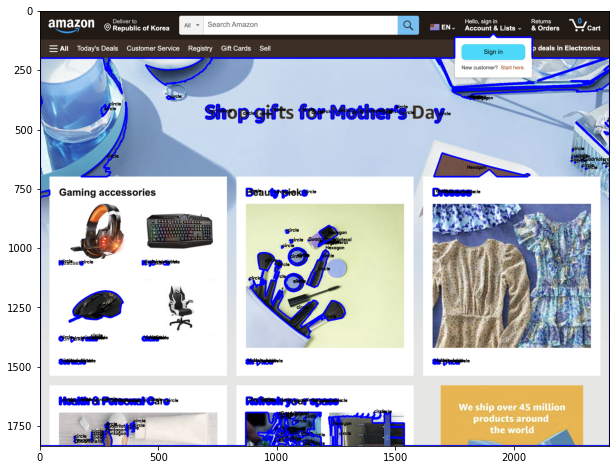

In [36]:
i = 0

for contour in contours:
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
        
    if check_in_box(boxes, cv2.boundingRect(contour)):
        print("hi")
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    print(len(approx))
    # putting shape name at center of each shape
    if len(approx) == 3:
        # using drawContours() function
        cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    elif len(approx) == 4:
        # using drawContours() function
        cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    elif len(approx) == 5:
        # using drawContours() function
        cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    elif len(approx) == 6:
        # using drawContours() function
        cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
    else:
        distances = [np.linalg.norm(i - approx.mean(axis=0)) for i in approx]
        print("   ", np.std(distances) / np.mean(distances))
        if np.std(distances) / np.mean(distances) < 10:
            # using drawContours() function
            cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
            cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
  
# displaying the image after drawing contours

plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.show()

In [30]:
from selenium.webdriver.common.action_chains import ActionChains
ac = ActionChains(driver)
ac.move_by_offset(609, 36).click().perform()

In [37]:
window_size = driver.get_window_size()
width = window_size["width"]
height = window_size["height"]

In [39]:
driver.execute_script("window.scrollTo(0, 1400)")

In [20]:
df[df.conf > 85]

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
5,5,1,1,1,1,2,209,47,36,32,94.800186,Al
6,5,1,1,1,1,3,417,52,49,21,92.375374,Our
7,5,1,1,1,1,4,476,53,74,20,92.738869,Focus
8,5,1,1,1,1,5,625,43,199,43,92.895432,Responsibilities
9,5,1,1,1,1,6,899,53,101,20,91.636620,Researc
10,5,1,1,1,1,7,1003,53,13,20,92.589745,h
11,5,1,1,1,1,8,1092,53,126,20,92.795082,Education
12,5,1,1,1,1,9,1293,42,65,43,91.878212,Tools
13,5,1,1,1,1,10,1434,53,68,26,92.533737,Blogs
17,5,1,2,1,1,1,145,238,415,86,91.309944,Advancing


In [15]:
import sys
sys.executable

'/usr/local/opt/python@3.9/bin/python3.9'

In [26]:
!{sys.executable} -m pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 8.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.5 MB/s eta 0:00:00m eta 0:00:010:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils con